# Importing and Cleaning the Data

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


#read in the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# Check the shape and datatypes
print("Shape:", train.shape)
display(train.dtypes)
train['Tenure'] = train['Tenure'].fillna(train['Tenure'].median())  
print("Tenure nulls:", train['Tenure'].isna().sum())
train['Support Calls'] = train['Support Calls'].replace('none', 0)
train['Support Calls'] = pd.to_numeric(train['Support Calls'], errors='coerce').fillna(0).astype(int)
train['Payment Delay'] = train['Payment Delay'].fillna(train['Payment Delay'].mean())  
train['Last Interaction'] = train['Last Interaction'].fillna(train['Last Interaction'].mean())



print("Shape:", train.shape)
display(train.dtypes)
test['Tenure'] = test['Tenure'].fillna(test['Tenure'].median())  
print("Tenure nulls:", test['Tenure'].isna().sum())
test['Support Calls'] = test['Support Calls'].replace('none', 0)
test['Support Calls'] = pd.to_numeric(test['Support Calls'], errors='coerce').fillna(0).astype(int)
test['Payment Delay'] = test['Payment Delay'].fillna(test['Payment Delay'].mean())  
test['Last Interaction'] = test['Last Interaction'].fillna(test['Last Interaction'].mean())

train.to_csv('train_cleaned.csv', index=False)
test.to_csv('test_cleaned.csv', index=False)



display(train.head())
print(train.shape)
display(test.head())
print(test.shape)


Shape: (303124, 15)


CustomerID             int64
Age                    int64
Gender                object
Tenure               float64
Usage Frequency        int64
Support Calls         object
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Customer Status       object
Last Due Date         object
Last Payment Date     object
Churn                  int64
dtype: object

Tenure nulls: 0
Shape: (303124, 15)


CustomerID             int64
Age                    int64
Gender                object
Tenure               float64
Usage Frequency        int64
Support Calls          int64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Customer Status       object
Last Due Date         object
Last Payment Date     object
Churn                  int64
dtype: object

Tenure nulls: 0


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Customer Status,Last Due Date,Last Payment Date,Churn
0,160831,34,Male,32.0,26,0,17.000000,Basic,Quarterly,890.21,30.000000,active,06-21,07-08,0
1,354435,30,Male,36.0,22,0,15.000000,Basic,Annual,954.37,30.000000,active,06-10,06-25,0
2,444576,23,Male,44.0,14,0,10.258073,Premium,Annual,674.00,21.000000,inactive,06-27,07-21,1
3,130847,24,Male,39.0,21,2,14.000000,Standard,Quarterly,775.00,18.000000,active,06-30,07-14,0
4,108121,26,Male,32.0,26,1,5.000000,Basic,Quarterly,679.45,14.051415,active,06-29,07-04,0


(303124, 15)


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Last Due Date,Last Payment Date,Customer Status
0,262106,65,Male,16.0,16,3,14,Standard,Monthly,853.00,4.0,06-21,07-05,active
1,37061,23,Male,32.0,12,3,6,Premium,Annual,860.00,21.0,06-03,06-09,active
2,361832,49,Male,32.0,25,2,4,Premium,Quarterly,905.58,15.0,06-13,06-17,active
3,425516,25,Female,48.0,11,7,16,Premium,Quarterly,446.00,8.0,06-14,06-30,active
4,60597,52,Female,4.0,10,6,3,Basic,Monthly,933.29,28.0,06-17,06-20,active


(133776, 14)


In [41]:
obj_cols = train.select_dtypes(include=['object']).columns
train = pd.get_dummies(train, columns=obj_cols, drop_first=True)
test = pd.get_dummies(test, columns=obj_cols, drop_first=True)

correlation_train = train.corrwith(train['Churn']).sort_values(ascending=False)
# show all of the correlations
print("Correlation with Churn:\n", correlation_train)  


Correlation with Churn:
 Customer Status_inactive     1.000000
Churn                        1.000000
Support Calls                0.424620
Contract Length_Monthly      0.401125
Age                          0.189481
                               ...   
Payment Delay               -0.034917
Usage Frequency             -0.049018
Contract Length_Quarterly   -0.141252
Gender_Male                 -0.158337
Total Spend                 -0.372350
Length: 105, dtype: float64


## Descriptive statistics

#### Categorical Columns

# give some simple eda for the dataset
print("Descriptive statistics:")
display(train.describe())
print("\nCategorical value counts:")
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length', 'Last Payment Date', 'Customer Status', 'Last Due Date']
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    display(train[col].value_counts())     

## Graphs

Here is the distribution of multiple different columns. Used to see which variables might be best to use for the model.  



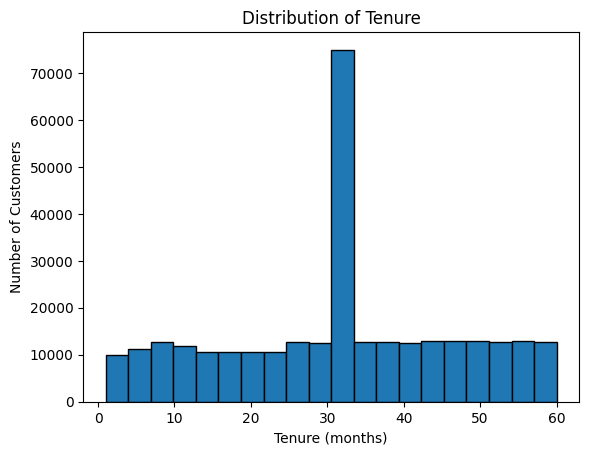

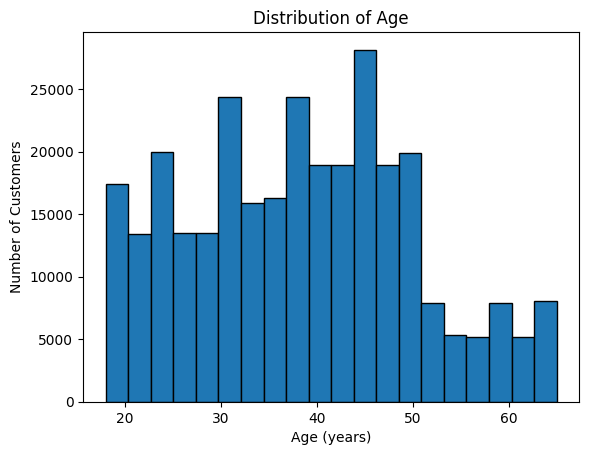

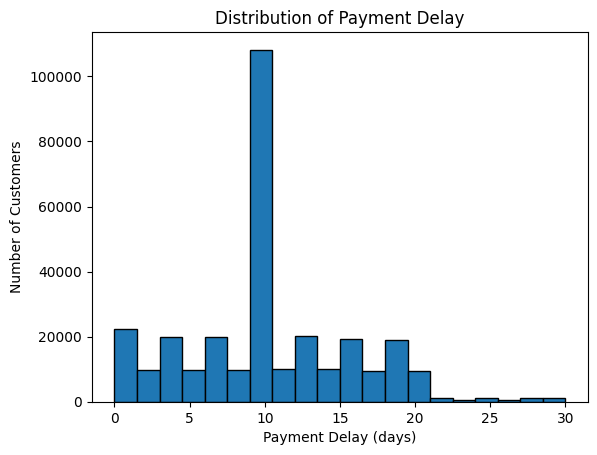

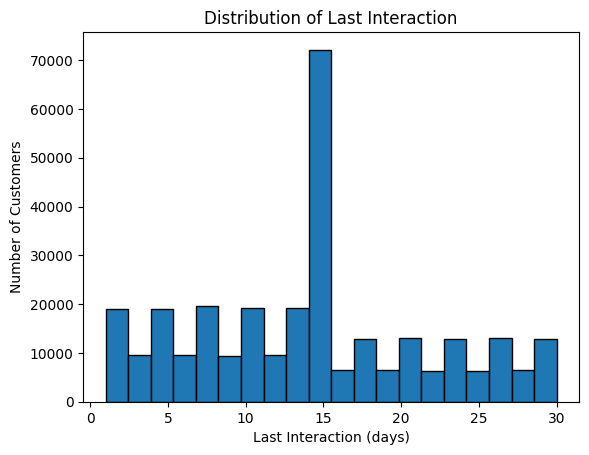

In [42]:
plt.hist(train['Tenure'], bins=20, edgecolor='black')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.show()  
# make a histogram to show the distribution of Age
plt.hist(train['Age'], bins=20, edgecolor='black')
plt.title('Distribution of Age')            
plt.xlabel('Age (years)')
plt.ylabel('Number of Customers')
plt.show()  
plt.hist(train['Payment Delay'], bins=20, edgecolor='black')
plt.title('Distribution of Payment Delay')            
plt.xlabel('Payment Delay (days)')
plt.ylabel('Number of Customers')
plt.show()  

plt.hist(train['Last Interaction'], bins=20, edgecolor='black')
plt.title('Distribution of Last Interaction')            
plt.xlabel('Last Interaction (days)')
plt.ylabel('Number of Customers')
plt.show()  

## KNN Model

Tried using different Features to get the ROC-AUC score higher. The best I got was Age and Tenure to be at .65 which is better than Linear Regression, but not quite the number we are striving for. The Function optimal_k finds the k that would be the best k to use for each KNN model. 

##### Be sure to try and use the features Tenure and Usage Frequency

In [ ]:

from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor

def optimal_k(data):   
    n = data.shape[0]
    k = int(np.sqrt(n))
    if k % 2 == 0:
        k += 1
    return k        

# Prepare features and target 
X = train[['Support Calls', 'Contract Length_Monthly', 'Age']].copy()
y = train['Churn'].copy()

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=67)



k = optimal_k(X_train)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=k))
])
pipeline.fit(X_train, y_train)
# Prepare test set and predict
X_test = test[['Support Calls', 'Contract Length_Monthly', 'Age']].copy()
# Pipeline will impute missing ages
test_pred = pipeline.predict(X_test)
# Create submission dataframe matching sample format
submission = pd.DataFrame({
    'CustomerID': test['CustomerID'].values,
    'Churn': test_pred
})
# Write submission to CSV (overwrites if exists)
submission.to_csv('Submission.csv', index=False)
print("Wrote Submission.csv. Preview:")
display(submission.head())
submission.shape


print(submission["Churn"].nunique())







Wrote Submission_KNN.csv. Preview:


,CustomerID,Churn
0,262106,0.730223
1,37061,0.669371
2,361832,0.052738
3,425516,0.789047
4,60597,0.766734


159


In [ ]:
def evaluate_model(pipeline, X_val, y_val):

    val_pred = pipeline.predict(X_val)
    val_pred_binary = (val_pred >= 0.5).astype(int)
    f1 = f1_score(y_val, val_pred_binary)
    precision = precision_score(y_val, val_pred_binary)
    recall = recall_score(y_val, val_pred_binary)
    roc_auc = roc_auc_score(y_val, val_pred)

    print(f"F1 Score: {f1:.4f}")
    print(f"Precision Score: {precision:.4f}")
    print(f"Recall Score: {recall:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    
    return f1, precision, recall, roc_auc






F1 Score: 0.7816
Precision Score: 0.7623
Recall Score: 0.8019
ROC AUC: 0.8752


(0.7816067313360845, 0.7623229313679368, 0.801891460933634, 0.8751502011662291)